In [1367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1368]:
data = pd.read_csv('SuperNovaMartSales.csv', parse_dates=['Date'])

## Exploring The Data 🔎

In [1369]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [1370]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [1371]:
data.shape

(1000, 17)

In [1372]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [1373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [1374]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Sales & Income 💰


## Total Sales 📉

In [1375]:
Total_Sales = data['Total'].sum()
print({Total_Sales})

{322966.749}


## Total Gross Income 💵

In [1376]:
Total_Gross_Income = data['gross income'].sum()
print({Total_Gross_Income})

{15379.368999999999}


## Total Cogs 💸

In [1377]:
Total_Cogs = data['cogs'].sum()
print({Total_Cogs})

{307587.38}


# Product Performance ✨

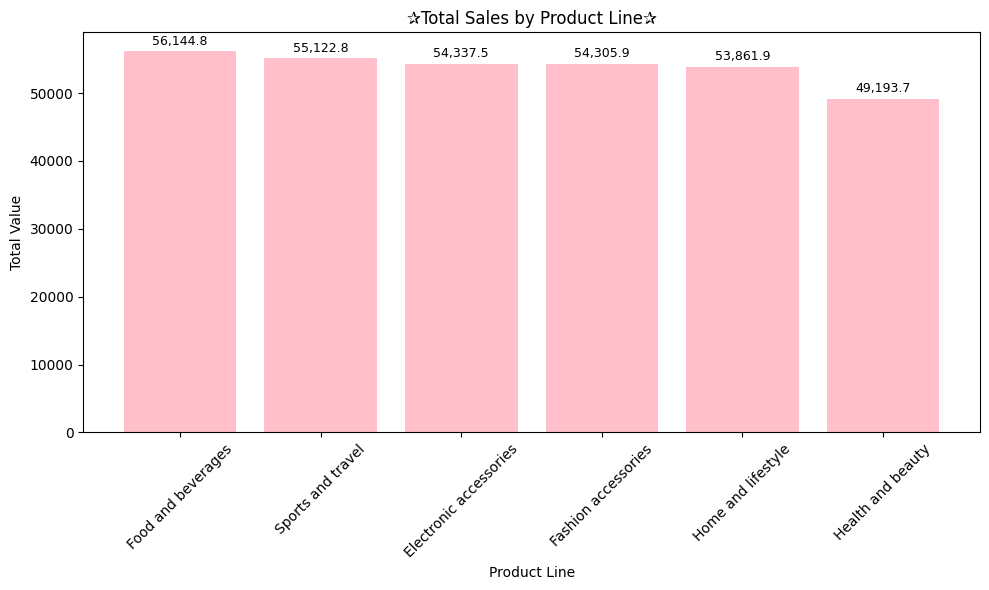

In [1378]:
Total_Value = data.groupby('Product line')['Total'].sum().reset_index()
Total_Value = Total_Value.sort_values(by='Total', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(Total_Value['Product line'], Total_Value['Total'], color = 'pink')
plt.xlabel('Product Line')
plt.ylabel('Total Value')
plt.title('✰Total Sales by Product Line✰')
plt.xticks(rotation=45)
plt.tight_layout()
total_values = Total_Value['Total']
for i, v in enumerate(total_values):
    plt.text(i, v + 500, '{:,.1f}'.format(v), ha='center', va='bottom', fontsize=9)
plt.show()

# Branch Performance 🏪

In [1379]:
TotalbyBranch = data.groupby('Branch')['Total'].sum().reset_index()
print(TotalbyBranch)


  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


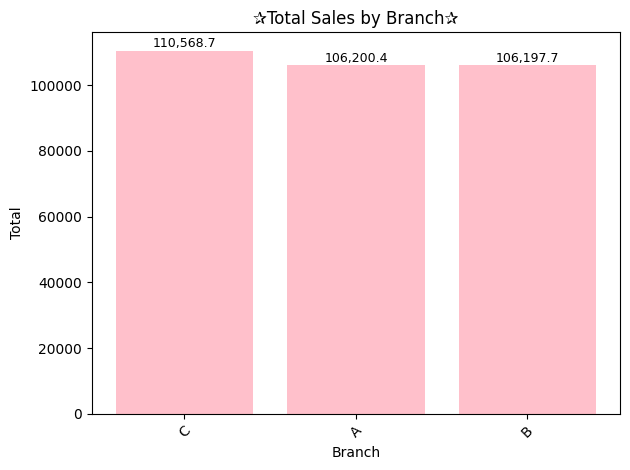

In [1380]:
TotalbyBranch = TotalbyBranch.sort_values(by='Total', ascending=False)
TotalbyBranch.reset_index(inplace=True)
plt.bar(TotalbyBranch.index, TotalbyBranch['Total'], color='pink')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('✰Total Sales by Branch✰')
plt.xticks(rotation=45)
plt.xticks(range(len(TotalbyBranch)), TotalbyBranch['Branch'], rotation=45)
plt.tight_layout()
for i, v in enumerate(TotalbyBranch['Total']):
    formatted_value = '{:,.1f}'.format(v)
    plt.text(i, v + 50, formatted_value, ha='center', va='bottom', fontsize=9)
plt.show()

In [1381]:
GrossIncomebyBranch = data.groupby('Branch')['gross income'].sum()
print(GrossIncomebyBranch)

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


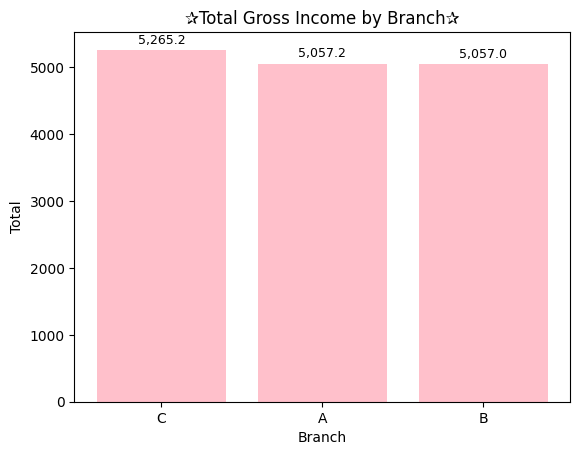

In [1382]:
GrossIncomebyBranch = GrossIncomebyBranch.sort_values(ascending=False)
plt.bar(GrossIncomebyBranch.index, GrossIncomebyBranch.values, color= 'pink')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('✰Total Gross Income by Branch✰')
for i, v in enumerate(GrossIncomebyBranch.values):
    plt.text(i, v + 50, '{:,.1f}'.format(v), ha='center', va='bottom', fontsize=9)
plt.show()

In [1383]:
RatingbyBranch = data.groupby('Branch')['Rating'].sum()
print(RatingbyBranch)

Branch
A    2389.2
B    2263.6
C    2319.9
Name: Rating, dtype: float64


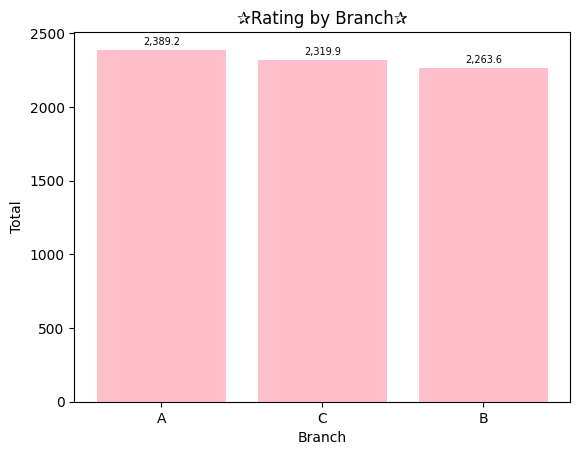

In [1384]:
RatingbyBranch = RatingbyBranch.sort_values(ascending=False)
plt.bar(RatingbyBranch.index, RatingbyBranch.values, color= 'pink')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('✰Rating by Branch✰')
for i, v in enumerate(RatingbyBranch.values):
    plt.text(i, v + 20, '{:,.1f}'.format(v), ha='center', va='bottom', fontsize=7)
plt.show()

# Customer Behavior 👱‍♀️👨

In [1385]:
Customer_Type = data['Customer type'].value_counts()

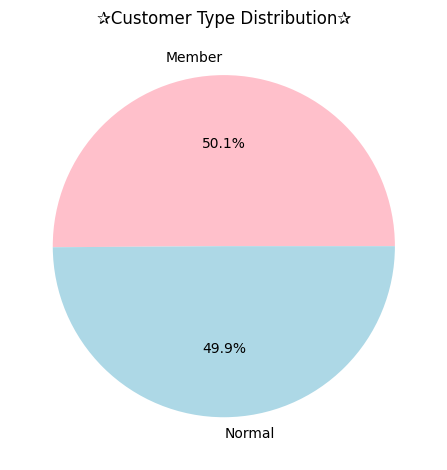

In [1386]:
plt.figure(figsize=(8, 8))
plt.pie(Customer_Type, labels=Customer_Type.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('✰Customer Type Distribution✰')
plt.tight_layout()
plt.show()

## Is There Any Correlation Between Gender and Total? 👩💸

In [1388]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [1389]:
correlation = np.corrcoef(data['Gender'], data['Total'])[0, 1]

In [1390]:
print("Correlation betwen 'Gender' & 'Total':", correlation)

Correlation betwen 'Gender' & 'Total': 0.04945098885448824


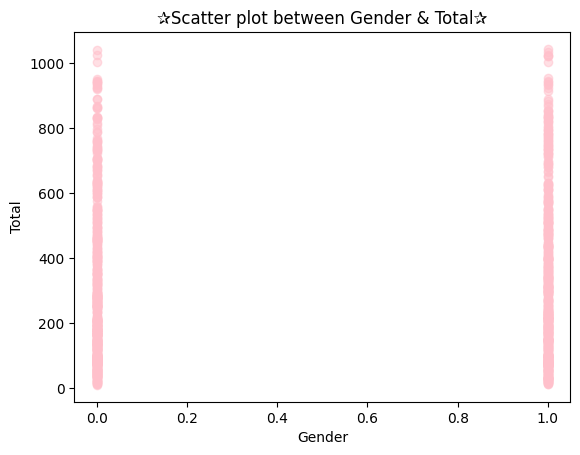

In [1391]:
plt.scatter(data['Gender'], data['Total'], alpha=0.5, color='pink')
plt.title('✰Scatter plot between Gender & Total✰')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

Text(0, 0.5, 'Total Spending')

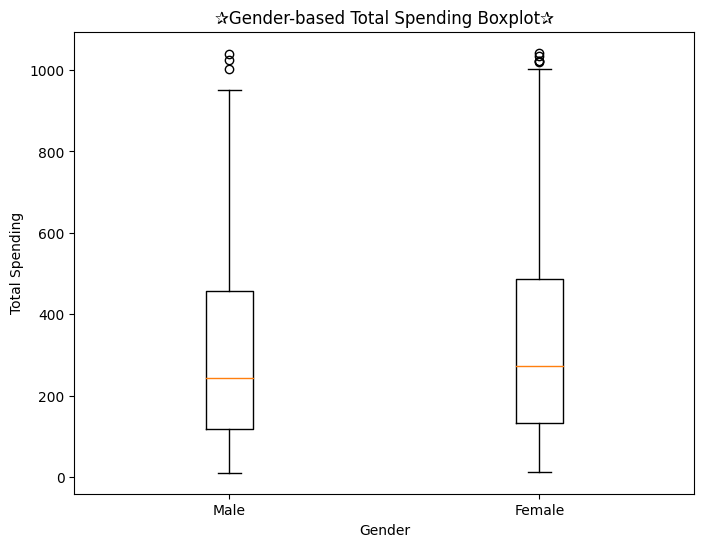

In [1392]:
plt.figure(figsize=(8, 6))  
plt.boxplot([data[data['Gender'] == 0]['Total'], data[data['Gender'] == 1]['Total']],
            labels=['Male', 'Female'])
plt.title('✰Gender-based Total Spending Boxplot✰')
plt.xlabel('Gender')
plt.ylabel('Total Spending')

## Payment 💸

In [1393]:
Payment_Methods = data['Payment'].value_counts()
print(Payment_Methods)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


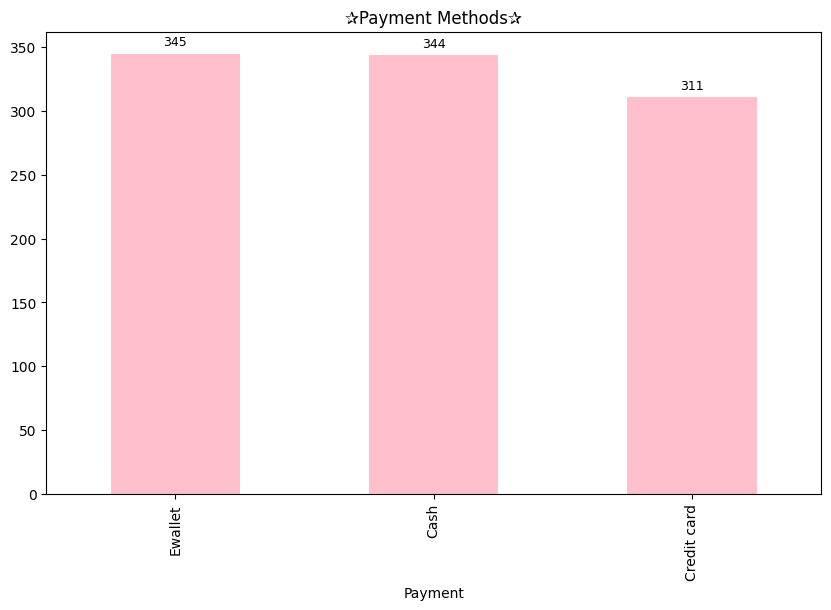

In [1394]:
Payment_Methods = Payment_Methods.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
data['Payment'].value_counts().plot(kind="bar", color="pink")
plt.title('✰Payment Methods✰')
for i, v in enumerate(Payment_Methods.values):
    plt.text(i, v + 4, '{}'.format(v), ha='center', va='bottom', fontsize=9)
plt.show()

In [1395]:
income_by_method = data.groupby("Payment")["Total"].sum().reset_index()
print(income_by_method)

       Payment       Total
0         Cash  112206.570
1  Credit card  100767.072
2      Ewallet  109993.107


In [1396]:
income_by_method = income_by_method.sort_values(by='Total', ascending=False)

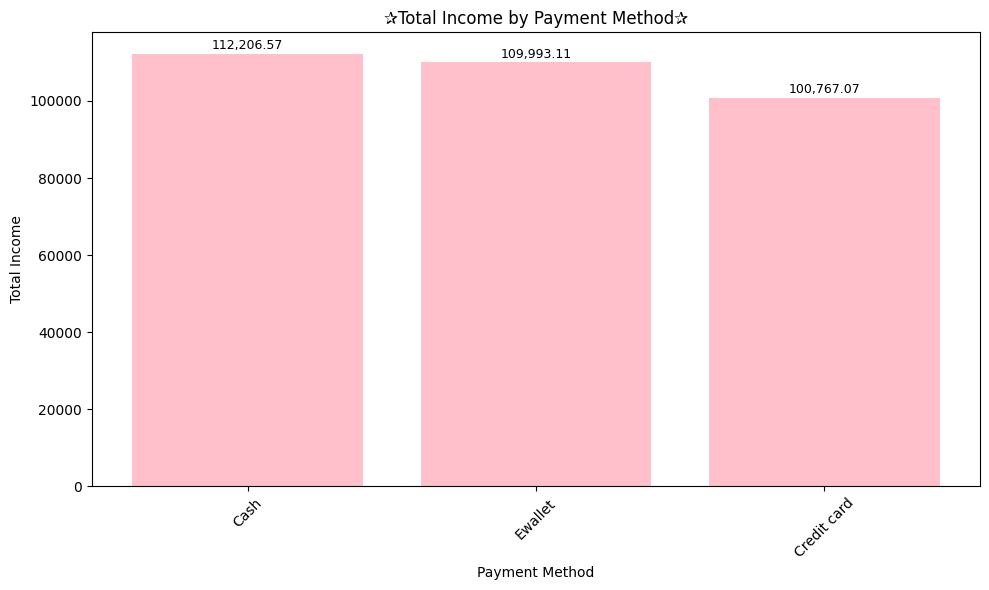

In [1397]:
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_method['Payment'], income_by_method['Total'], color='pink')
plt.xlabel('Payment Method')
plt.ylabel('Total Income')
plt.title('✰Total Income by Payment Method✰')
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(income_by_method['Total']):
    plt.text(i, v + 500, '{:,.2f}'.format(v), ha='center', va='bottom', fontsize=9)

plt.show()